# Instartcart Market Analysis
*By Don Kim*

`instacart`


# Data Analysis Cycle
---

> <a href="#Reading-datasets">1. Reading datasets</a><ul></ul>
> <a href="#Initial-data-cleaning">2. Initial data cleaning</a><ul></ul>
> <a href="#Data-exploration">3. Data exploration</a><ul></ul>
> <a href="#Correlation">4. Correlation</a><ul></ul>
> <a href="#Association-rule">5. Association rule</a><ul></ul>
> <a href="#Customer-segmentation">6. Customer segmentation</a><ul></ul>
> <a href="#Reorder-Classification">7. Reorder Classification</a><ul></ul>

# Datasets links
<a href="https://storage.googleapis.com/instacart-datasets/aisles.csv">aisles.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/departments.csv">departments.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/order_products__prior.csv">order_products__prior.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/order_products__train.csv">order_products__train.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/orders.csv">orders.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/products.csv">products.csv</a><ul></ul>

[entire dataset from Instacart site](https://www.kaggle.com/c/instacart-market-basket-analysis/overview)


---
---

# Reading datasets
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


datasets are loaded locally.

In [2]:
%%time
aisles = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/departments.csv')
order_products_prior = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/order_products__prior.csv')
order_products_train = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/order_products__train.csv')
orders = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/orders.csv')
products = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/products.csv')
df_list = []
df_list.append(aisles)
df_list.append(departments)
df_list.append(order_products_prior)
df_list.append(order_products_train)
df_list.append(orders)
df_list.append(products)

CPU times: user 11.1 s, sys: 2.46 s, total: 13.6 s
Wall time: 14.4 s


---
---

# Initial data cleaning
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

It shows all the datatypes and number of null values in datasets. Null values are removed instead of replacing.

In [3]:
for l in df_list:
  print(l.info())
  print(l.shape)
  print(' - NaN in dataset - ')
  print(l.isnull().sum())
  print('--------------------------------------------')

# orders.days_since_prior_order.dropna(axis=0, how='any',inplace=True)
# orders['days_since_prior_order'] = orders.days_since_prior_order.astype(int)
orders.days_since_prior_order.dropna(inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
(134, 2)
 - NaN in dataset - 
aisle_id    0
aisle       0
dtype: int64
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
(21, 2)
 - NaN in dataset - 
department_id    0
department       0
dtype: int64
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):


---
---

# Data exploration
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

## Plot of order demand during week over 24 hours

It shows a plot of order count in 24 hours. Each line represents monday to sunday

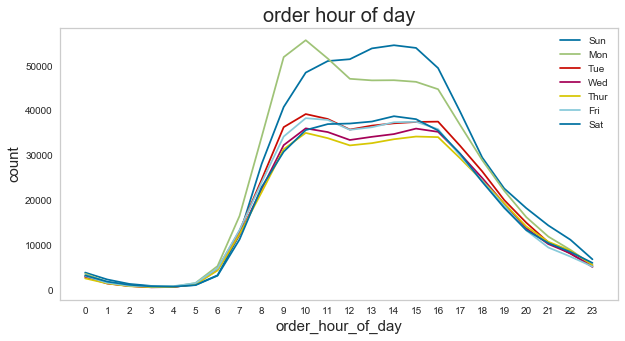

In [58]:
#
path='/content/drive/My Drive/'
plt.figure(figsize=(10,5))
for i in range(0,7):
  orders[orders['order_dow']==i].groupby('order_hour_of_day').size().plot()
plt.legend(['Sun','Mon','Tue','Wed','Thur','Fri','Sat'])
plt.title('order hour of day', fontsize= 20)
plt.xlabel('order_hour_of_day', fontsize= 15) 
plt.ylabel('count', fontsize= 15)
plt.xticks(range(0,24))
plt.grid()
#plt.savefig(path+'.png')
plt.show()

## Number of order in a week

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 <a list of 8 Text yticklabel objects>)

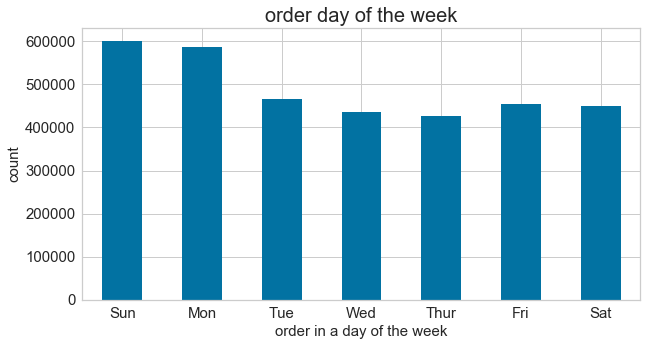

In [59]:
plt.figure(figsize=(10,5))
orders.groupby('order_dow').size().plot(kind="bar")
plt.title('order day of the week',fontsize=20)
plt.xlabel('order in a day of the week',fontsize=15) 
plt.ylabel('count',fontsize=15)
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],rotation=0,fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig(path+'.png')

## Days since order has placed

Plot shows how long the delay is when customer do next order. Pick order day is after 7 days. Anything over 30 days is in 30 days bar.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

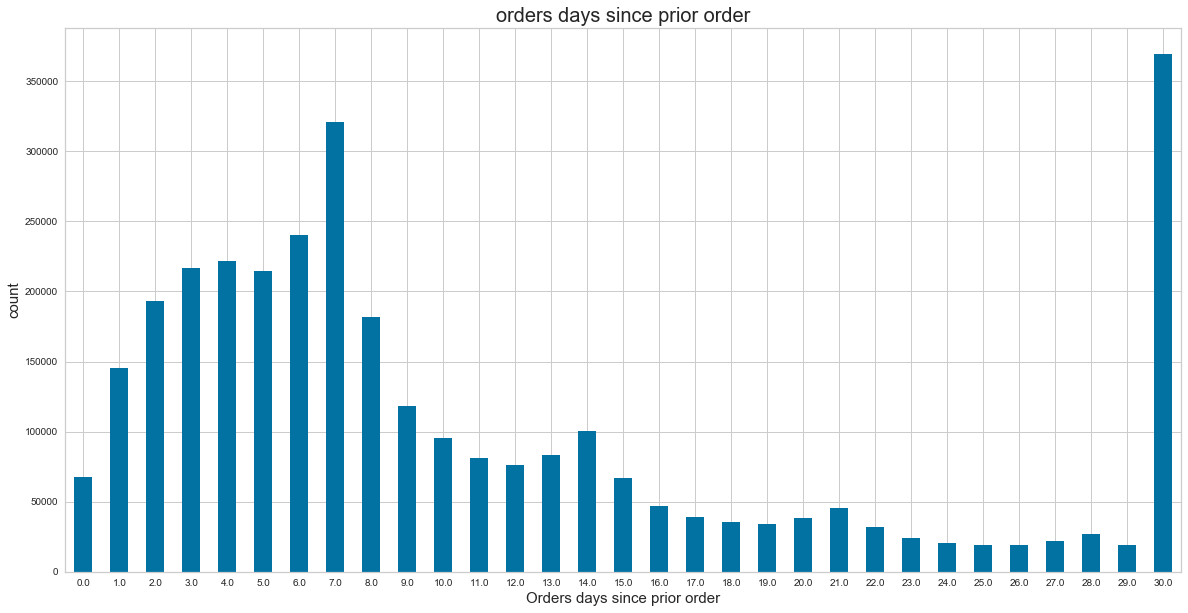

In [60]:
plt.figure(figsize=(20,10))
orders.groupby('days_since_prior_order').size().plot(kind="bar")
plt.title('orders days since prior order', fontsize=20)
plt.xlabel('Orders days since prior order', fontsize=15)
plt.ylabel('count',fontsize =15)
plt.xticks(rotation=0)



## Finding top 10 selling products

### - Merge dataset 
Merge dataset in order to find product name.

In [61]:
new_train = pd.merge(order_products_train, products, on='product_id')
new_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


### - Plot of 10 selling products

TypeError: 'Text' object is not callable

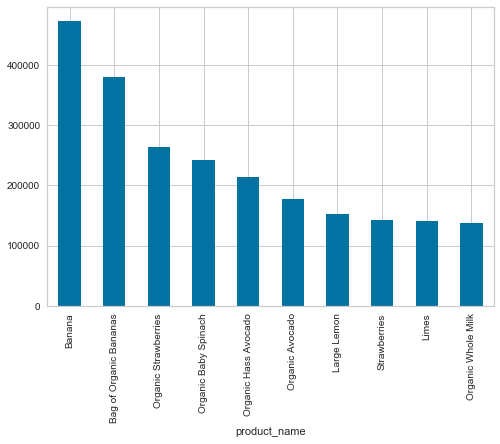

In [62]:
#df = pd.DataFrame({'Product_ID':order_products_train.product_id.unique()})
#df.groupby('Product_ID').count()
#df
#order_products_train.product_id.value_counts()
#c = products[products.product_id.isin(df.index)].product_name
# merge https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
new_train = pd.merge(order_products_prior, products, on='product_id')
df = new_train.groupby('product_name').size().to_frame('size')
df2 = df.sort_values(by='size', ascending=False).head(10)
p = df2.plot.bar()
p.legend().remove()
p.title('Top 10 selling products')

## Plot of reorder ratio
58% products are reordered

1    0.589697
0    0.410303
Name: reordered, dtype: float64


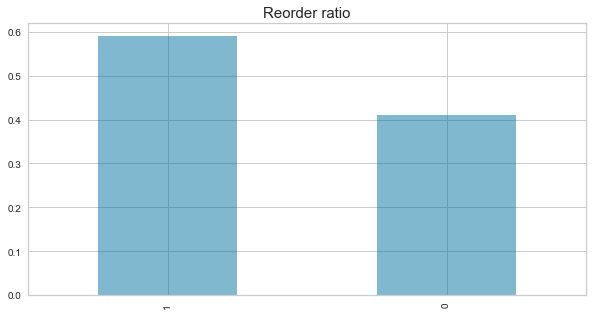

In [63]:
plt.figure(figsize=(10,5))
order_products_train.head()
#df.plot.bar( y='size', rot =0)
order_products_prior.reordered.value_counts(normalize=True).plot(kind="bar",alpha =0.5)
plt.title('Reorder ratio',fontsize=15)
print(order_products_prior.reordered.value_counts(normalize=True))

## Distribution of number of order items

Maximum number of order items is 145. Median size of order is 8.


          size
order_id      
2            9
3            8
4           13
5           26
6            3
               size
count  3.214874e+06
mean   1.008888e+01
std    7.525398e+00
min    1.000000e+00
25%    5.000000e+00
50%    8.000000e+00
75%    1.400000e+01
max    1.450000e+02
median  size    8.0
dtype: float64
max size    145
dtype: int64


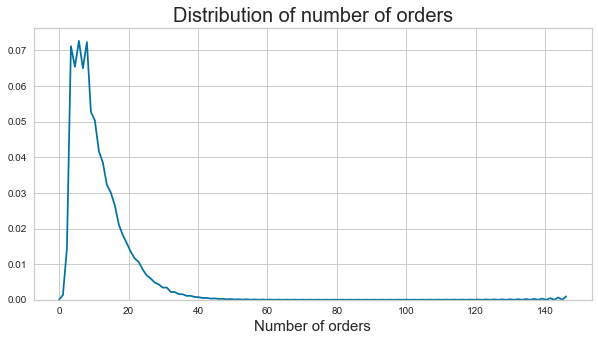

In [64]:

df = order_products_prior.groupby('order_id').size().to_frame('size')
#df2 = df.sort_values(by='size', ascending=False).head(30)
#df2.plot.bar()
#print(df2)
#order_products_train.order_id.value_counts().plot(kind="bar",alpha =0.5)
#order_products_train.order_id.value_counts(
plt.figure(figsize=(10,5))
print(df.head())
sns.distplot(df,hist=False)
plt.title('Distribution of number of orders', fontsize =20)
plt.xlabel('Number of orders', fontsize =15)
print(df.describe())
print('median ',df.median())
print('max', df.max())


## Number of orders for customers

Customers orders at least 3 times.

Text(0.5, 0, 'Order numbers')

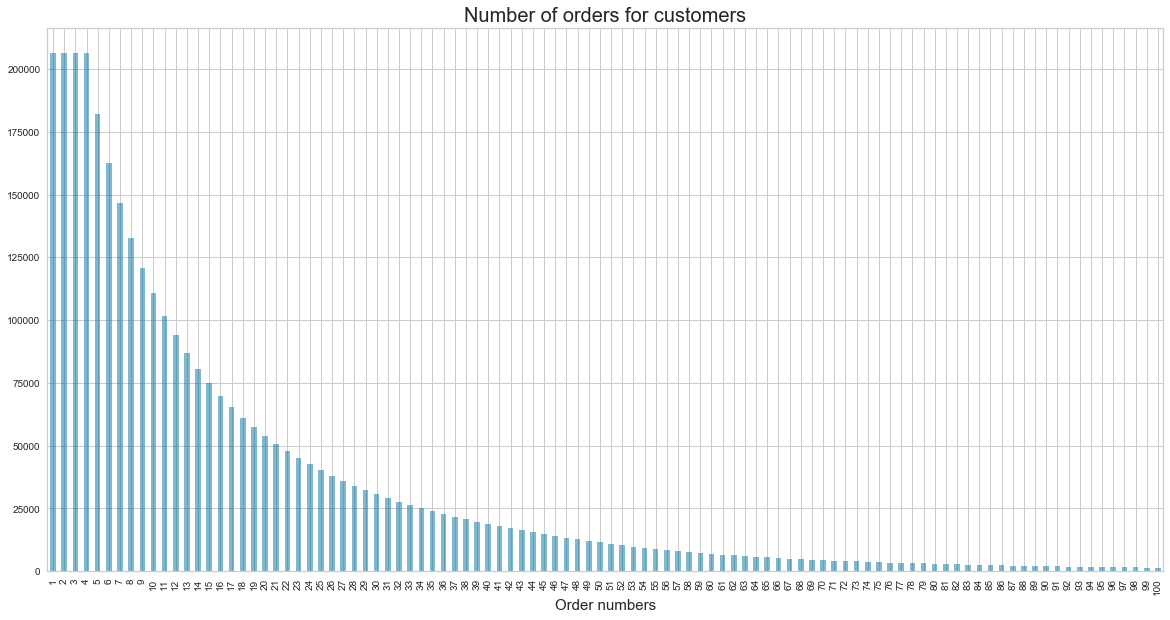

In [65]:
plt.figure(figsize=(20,10))
orders.order_number.value_counts(normalize=False).plot(kind="bar",alpha =0.5)

plt.title('Number of orders for customers',fontsize=20)
plt.xlabel('Order numbers',fontsize=15)
# It shows that cusotmer orders at least 3 times and more.


## Pie chart of product distribution

Produce, daily eggs, snack and beverage are over 50% of product sold.



([<matplotlib.patches.Wedge at 0x1b73d18690>,
 [Text(0.6680107956168984, 0.8739345381315918, 'produce'),
  Text(-0.7813301447473172, 0.7742888381664407, 'dairy eggs'),
  Text(-1.0997036040614931, -0.025533961975437093, 'snacks'),
  Text(-0.929949414726075, -0.5875322000117363, 'beverages'),
  Text(-0.5562240525522754, -0.949007272555023, 'frozen'),
  Text(-0.14462287136854038, -1.0904513859302114, 'pantry'),
  Text(0.17936859203453256, -1.0852773416005466, 'bakery'),
  Text(0.40926728358851094, -1.021029035132734, 'canned goods'),
  Text(0.6087978507482359, -0.916168749152867, 'deli'),
  Text(0.7675383742555044, -0.7879624636016728, 'dry goods pasta'),
  Text(0.8803045342869532, -0.659593759001577, 'household'),
  Text(0.9638794655266397, -0.5300343158099101, 'breakfast'),
  Text(1.0273913179752587, -0.3930230015521494, 'meat seafood'),
  Text(1.0648739543951256, -0.27575978903909826, 'personal care'),
  Text(1.0843221007029922, -0.18505561846928756, 'babies'),
  Text(1.094293152963774

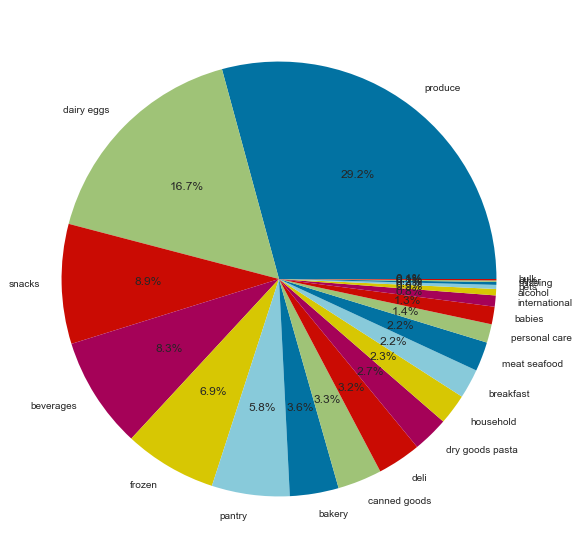

In [52]:
p_df=pd.merge(products,departments,on='department_id')
p_df=pd.merge(p_df,aisles, on ='aisle_id')
o_df=pd.merge(p_df,order_products_prior,on = 'product_id')
plt.figure(figsize=(20,10))
result = o_df['department'].value_counts(normalize=True)
plt.pie(result,labels=result.index, autopct='%1.1f%%')

---
---

# Correlation
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

### Correlation of orders

In [51]:
orders.head()
order_products = order_products_prior.append(order_products_train)
order_size = order_products.groupby('order_id').size().to_frame('order_size')
new_orders = pd.merge(orders, order_size, on='order_id')
new_orders.head()
new_orders.drop(columns=['order_id','user_id'],inplace=True)
# import numpy as np
# f, ax = plt.subplots(figsize=(10, 8))
corr = new_orders.corr()
# #sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
# #            square=True, ax=ax)
corr.style.background_gradient(cmap='coolwarm')



,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_size
order_number,1.000000,0.015157,-0.035910,-0.360495,-0.002118
order_dow,0.015157,1.000000,0.006082,-0.028409,-0.025404
order_hour_of_day,-0.035910,0.006082,1.000000,0.000863,-0.005596
days_since_prior_order,-0.360495,-0.028409,0.000863,1.000000,0.057544
order_size,-0.002118,-0.025404,-0.005596,0.057544,1.000000


In [54]:
#import numpy as np
#f, ax = plt.subplots(figsize=(10, 8))
#corr = o_df.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
#corr.style.background_gradient(cmap='coolwarm')

---
---

# Association rule
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>


This machine learning is to find products relations. Using association rule, we can find relationshop of products customers are buying. For example, if customer buys product A, what chances that product B will be bought by same customer. 


In [4]:
#!pip install apyori


## Restructure the dataset

For each order ID, there are bags of product IDs. This dataset will be used in association rule.

In [102]:
%%time
# 6mins
prior = order_products_prior.groupby(['order_id'])['product_id'].apply(list)
prior.head()


CPU times: user 6min 31s, sys: 9.24 s, total: 6min 40s
Wall time: 6min 51s


order_id
2    [33120, 28985, 9327, 45918, 30035, 17794, 4014...
3    [33754, 24838, 17704, 21903, 17668, 46667, 174...
4    [46842, 26434, 39758, 27761, 10054, 21351, 225...
5    [13176, 15005, 47329, 27966, 23909, 48370, 132...
6                                [40462, 15873, 41897]
Name: product_id, dtype: object

## Apriori association
* Minimum length is 2
* Minimum support is 0.01
* Minimum confidence is 0.1
* Minimum lift is 2

Total 7 items are returned

In [103]:
%%time
# 44seconds
from apyori import apriori
associations = apriori(prior, min_length = 2, min_support = 0.01, min_confidence = 0.1, min_lift = 2)
associations = list(associations)


CPU times: user 38.1 s, sys: 2.72 s, total: 40.8 s
Wall time: 42.5 s


In [104]:
print(len(associations))

7


## Interpretation of association result

Banana has strong relation to other fruites: raspberries, avocado

In [140]:
%%time
def product_name(id):
    return products[products['product_id']==id]['product_name'].values[0]

# df = pd.DataFrame(columns=['A','B','support','confidence','lift'])
for item in associations:    
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + str(product_name(items[0]) + " -> " + str(product_name(items[1]))))
    print("support " + str(item[1]))
    print("confidence: " + str(item[2][0][2]))
    print("lift: " + str(item[2][0][3]))
    print('')
    row = {'A':product_name(items[0]),
           'B':product_name(items[1]),
           'support':item[1],
           'confidence':item[2][0][2],
           'lift':item[2][0][3]}
    df = df.append(row,ignore_index=True)
df
    



Rule: Bag of Organic Bananas -> Organic Raspberries
support 0.012598627504530504
confidence: 0.10674133614441955
lift: 2.5037754094716407

Rule: Bag of Organic Bananas -> Organic Hass Avocado
support 0.019391428715402222
confidence: 0.164293055738569
lift: 2.4729449456629538

Rule: Organic Strawberries -> Organic Raspberries
support 0.01053322774080726
confidence: 0.12793794841376288
lift: 3.0009732007029744

Rule: Organic Strawberries -> Organic Hass Avocado
support 0.012689144271284038
confidence: 0.15412398982934303
lift: 2.3198798022259126

Rule: Organic Hass Avocado -> Organic Baby Spinach
support 0.010856101980979659
confidence: 0.14426610339739007
lift: 2.171498543400166

Rule: Banana -> Organic Fuji Apple
support 0.01055811207530995
confidence: 0.37869287754373443
lift: 2.576259109330009

Rule: Banana -> Organic Avocado
support 0.016608738009638947
confidence: 0.11298974744215082
lift: 2.054394713787502

CPU times: user 69.5 ms, sys: 6.65 ms, total: 76.1 ms
Wall time: 93.4 ms


,A,B,support,confidence,lift
0,Bag of Organic Bananas,Organic Raspberries,0.012599,0.106741,2.503775
1,Bag of Organic Bananas,Organic Hass Avocado,0.019391,0.164293,2.472945
2,Organic Strawberries,Organic Raspberries,0.010533,0.127938,3.000973
3,Organic Strawberries,Organic Hass Avocado,0.012689,0.154124,2.319880
4,Organic Hass Avocado,Organic Baby Spinach,0.010856,0.144266,2.171499
5,Banana,Organic Fuji Apple,0.010558,0.378693,2.576259
6,Banana,Organic Avocado,0.016609,0.112990,2.054395


---
---

# Customer segmentation
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>


Customer segmentation is processed using K mean clustering. Features that are used in here are 
* Total number of orders
* Average of days since order
* Average size of orders per customer
* Total reordered



In [ ]:
#!pip install yellowbrick

In [4]:
# columns user_id, total number of orders, average of days_since_prior_order, avarage size of orders per customer

c = order_products_prior.groupby('order_id')['product_id'].count()
r = order_products_prior.groupby('order_id')['reordered'].sum()
df = pd.concat([c, r], axis=1)
df = df.reset_index()
cust_orders = pd.merge(orders, df, on='order_id')
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
0,2539329,1,prior,1,2,8,NaN,5,0
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5


## Cleaning of customer dataset

In [5]:
# cust_orders.days_since_prior_order.dropna(axis=0, how='any',inplace=True)
cust_orders.dropna(inplace=True)
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5
5,3367565,1,prior,6,2,7,19.0,4,4


In [6]:
cust_orders = cust_orders[cust_orders.eval_set != 'train']
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5
5,3367565,1,prior,6,2,7,19.0,4,4


## Construct the dataset
Constructing 4 columns of dataset

In [13]:
# total number of orders
c = cust_orders.groupby('user_id')['product_id'].count() 
# average of days since the order
d = cust_orders.groupby('user_id')['days_since_prior_order'].mean() 
# avarage size of orders per customer
a = cust_orders.groupby('user_id')['product_id'].mean()
# total reordered items per customer
r = cust_orders.groupby('user_id')['reordered'].mean()

df = pd.concat([c,d,a,r],axis=1)
df = df.reset_index()
# new_c = pd.merge(c, d, on='user_id', copy=True)
# new_c = pd.merge(new_c, a, on='user_id', copy=True)
# new_c = pd.merge(new_c, r, on='user_id', copy=True)
df.columns = ['user_id','total_orders','average_days_since_order'
                 ,'average_size_of_orders','total_reordered']
# drop user-id column
df.drop(['user_id'], axis=1, inplace = True)
df.head()

,total_orders,average_days_since_order,average_size_of_orders,total_reordered
0,9,19.555556,6.000000,4.555556
1,13,15.230769,14.000000,7.153846
2,11,12.090909,7.090909,5.000000
3,4,13.750000,3.500000,0.250000
4,3,13.333333,8.666667,4.666667


## Elbow method
Using elbow method, finding the cluster size.
In this case, the cluster size would be 4.

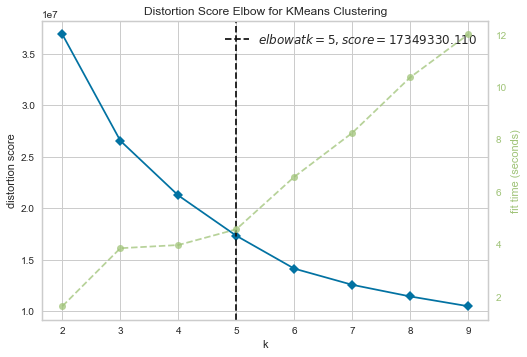

/Users/donkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a20655790>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [14]:
%%time
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

kelbow_visualizer(KMeans(random_state=1), df, k=(2,10))

## K Mean
Generated 4 clusters. However, all of 4 clusters are very similar. Possibly, variables are needed to be changed

In [15]:
import sklearn
from sklearn.cluster import KMeans

# df = scaler.transform(df)
clustering = KMeans(n_clusters=5, random_state = 2)
model = clustering.fit(df)
df_new = df.assign(Cluster = model.labels_)

print(model.cluster_centers_)
# df
result = df_new.groupby('Cluster').mean()
result.head()




[[10.38977751 11.80302911  7.70498999  3.5444832 ]
 [33.99776025  8.93126862 10.35572534  7.07953133]
 [ 9.0254815  16.27818744 19.61397889 10.30420508]
 [73.08571771  4.70462406  9.72468065  7.42636973]
 [ 4.66228442 23.07323749  7.74891875  2.70001251]]


,total_orders,average_days_since_order,average_size_of_orders,total_reordered
Cluster,,,,
0,10.418738,11.793417,7.716277,3.554531
1,34.012697,8.928211,10.364182,7.086662
2,8.985992,16.306226,19.622553,10.298292
3,73.085718,4.704624,9.724681,7.426370
4,4.664466,23.053657,7.733388,2.693712


In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
result_scaled = sc.fit_transform(result)
result_scaled


array([[-0.61855337, -0.1845474 , -0.74965421, -0.95917504],
       [ 0.30426182, -0.63888834, -0.1510265 ,  0.3157383 ],
       [-0.67459142,  0.53105676,  1.94206904,  1.47496739],
       [ 1.83249943, -1.30863007, -0.29560243,  0.43835473],
       [-0.84361645,  1.60100905, -0.74578589, -1.26988538]])

In [46]:
result_scaled = pd.DataFrame(data=result_scaled, index = ['cluster1',
                                          'cluster2',
                                          'cluster3',
                                          'cluster4',
                                          'cluster5'],        
                                          columns=['total_orders', 
                                       'average_days_since_order',
                                       'average_size_of_order',
                                       'totla_reordered'])

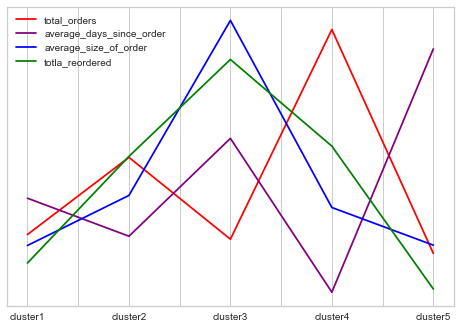

In [54]:
ax = plt.gca()
result_scaled.plot(y = 'total_orders',color='red',ax=ax)
result_scaled.plot(y = 'average_days_since_order',color='purple',ax=ax)
result_scaled.plot(y = 'average_size_of_order',color='blue',ax=ax)
result_scaled.plot(y = 'totla_reordered',color='green',ax=ax)
ax.get_yaxis().set_visible(False)

---
---

# Reordered item analysis
https://rstudio-pubs-static.s3.amazonaws.com/446413_6ac206ffa826466bb3a33be2f338c61f.html

## 1) Reorder vs total order number

In [55]:

## Reorder vs total order number
a = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
r = order_products_prior.groupby('order_id')['reordered'].sum()
total_order = pd.concat([a,r],axis=1)
total_order = total_order.reset_index()

total_order.columns = ['order_id','total_order','total_reordered']
total_order.head()

total_order['total_reordered_ratio']= total_order['total_reordered']/total_order['total_order']
total_order.head()



,order_id,total_order,total_reordered,total_reordered_ratio
0,2,9,6,0.666667
1,3,8,8,1.000000
2,4,13,12,0.923077
3,5,26,21,0.807692
4,6,3,0,0.000000


## 2) Reorder vs Product ID

In [56]:
##Reorder vs Dat since prior order

reordered_rate = order_products_prior.groupby('product_id', sort=False)['reordered'].mean()
# .sort_values(ascending=False)


reordered_rate = reordered_rate.reset_index()
reordered_rate.columns = ['product_id','reordered_rate']
reordered_rate.head()

,product_id,reordered_rate
0,33120,0.708454
1,28985,0.694465
2,9327,0.157962
3,45918,0.272849
4,30035,0.507909


## 3) Reorder vs order_hour_of_day

In [6]:
order_hour_of_day_rate = pd.merge(orders,order_products_prior, on='order_id')
order_hour_of_day_rate = order_hour_of_day_rate.groupby('order_hour_of_day')['reordered'].mean()

order_hour_of_day_rate = order_hour_of_day_rate.reset_index()
order_hour_of_day_rate.columns = ['order_hour_of_day','order_hour_of_day_rate']
order_hour_of_day_rate.head()

,order_hour_of_day,order_hour_of_day_rate
0,0,0.565500
1,1,0.557114
2,2,0.554455
3,3,0.559498
4,4,0.571195


## 4) Reorder vs order_dow

In [7]:
order_dow_rate = pd.merge(orders,order_products_prior, on='order_id')
order_dow_rate = order_dow_rate.groupby('order_dow')['reordered'].mean()

order_dow_rate = order_dow_rate.reset_index()
order_dow_rate.columns = ['order_dow','order_dow_rate']
order_dow_rate

,order_dow,order_dow_rate
0,0,0.585276
1,1,0.603843
2,2,0.589771
3,3,0.586272
4,4,0.590979
5,5,0.595470
6,6,0.574369


# Reorder Classification
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

## Combine all the dataset
Independent variable is reordered column

In [57]:
new_order_prior = []

In [58]:
%%time
# 3 mins
# new_order_prior=pd.merge(products,order_products_prior,  on='product_id')
# new_order_prior=pd.merge(aisles,new_order_prior,  on='aisle_id')
new_order_prior=pd.merge(orders,order_products_prior,  on='order_id')
new_order_prior=pd.merge(total_order,new_order_prior,  on='order_id')
new_order_prior=pd.merge(reordered_rate,new_order_prior,  on='product_id')
new_order_prior.head()

CPU times: user 1min 22s, sys: 1min 33s, total: 2min 55s
Wall time: 3min 40s


,product_id,reordered_rate,order_id,total_order,total_reordered,total_reordered_ratio,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,33120,0.708454,2,9,6,0.666667,202279,prior,3,5,9,8.0,1,1
1,33120,0.708454,26,8,2,0.250000,153404,prior,2,0,16,7.0,5,0
2,33120,0.708454,120,16,0,0.000000,23750,prior,11,6,8,10.0,13,0
3,33120,0.708454,327,8,6,0.750000,58707,prior,21,6,9,8.0,5,1
4,33120,0.708454,390,34,31,0.911765,166654,prior,48,0,12,9.0,28,1


In [17]:
new_order_prior.dtypes

product_id                  int64
reordered_rate            float64
order_id                    int64
total_order                 int64
total_reordered             int64
total_reordered_ratio     float64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
add_to_cart_order           int64
reordered                   int64
dtype: object

## Data cleaning of order dataset

In [59]:
%%time
new_order_prior.dropna(inplace=True)
new_order_prior = new_order_prior[new_order_prior.eval_set != 'train']
new_order_prior.head()

CPU times: user 14.7 s, sys: 31 s, total: 45.6 s
Wall time: 1min 11s


,product_id,reordered_rate,order_id,total_order,total_reordered,total_reordered_ratio,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,33120,0.708454,2,9,6,0.666667,202279,prior,3,5,9,8.0,1,1
1,33120,0.708454,26,8,2,0.250000,153404,prior,2,0,16,7.0,5,0
2,33120,0.708454,120,16,0,0.000000,23750,prior,11,6,8,10.0,13,0
3,33120,0.708454,327,8,6,0.750000,58707,prior,21,6,9,8.0,5,1
4,33120,0.708454,390,34,31,0.911765,166654,prior,48,0,12,9.0,28,1


# Feature selection

Removed all the categorical columns since sklearn cannot handle strings. Order_id is removed because it is not relevant.

In [60]:
# unrelevant features
new_order_prior.drop(['product_id',
                      'order_id',
                      'user_id',
                      'eval_set'], axis=1, inplace = True)

In [61]:
# features that are lower than 0.02
new_order_prior.drop(['total_order',
                      'order_dow',
                      'order_hour_of_day'], axis=1, inplace = True)
new_order_prior.head()

,reordered_rate,total_reordered,total_reordered_ratio,order_number,days_since_prior_order,add_to_cart_order,reordered
0,0.708454,6,0.666667,3,8.0,1,1
1,0.708454,2,0.250000,2,7.0,5,0
2,0.708454,0,0.000000,11,10.0,13,0
3,0.708454,6,0.750000,21,8.0,5,1
4,0.708454,31,0.911765,48,9.0,28,1


In [62]:
%%time
corr = new_order_prior.corr()
corr.style.background_gradient(cmap='coolwarm')

CPU times: user 4.55 s, sys: 3.24 s, total: 7.79 s
Wall time: 8.83 s


,reordered_rate,total_reordered,total_reordered_ratio,order_number,days_since_prior_order,add_to_cart_order,reordered
reordered_rate,1.000000,0.062083,0.200248,0.059858,-0.036800,-0.143393,0.325475
total_reordered,0.062083,1.000000,0.510675,0.238205,-0.072660,0.534086,0.295873
total_reordered_ratio,0.200248,0.510675,1.000000,0.433179,-0.229236,0.006018,0.579376
order_number,0.059858,0.238205,0.433179,1.000000,-0.358422,-0.004921,0.250973
days_since_prior_order,-0.036800,-0.072660,-0.229236,-0.358422,1.000000,0.053951,-0.132814
add_to_cart_order,-0.143393,0.534086,0.006018,-0.004921,0.053951,1.000000,-0.145232
reordered,0.325475,0.295873,0.579376,0.250973,-0.132814,-0.145232,1.000000


In [63]:
X = new_order_prior.iloc[:, :-1].values
y = new_order_prior.iloc[:, -1].values

In [64]:
%%time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

CPU times: user 14.8 s, sys: 3.02 s, total: 17.8 s
Wall time: 19.2 s


## Feature scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [1,3,4,5]] = sc.fit_transform(X_train[:, [1,3,4,5]])
X_test[:, [1,3,4,5]] = sc.transform(X_test[:, [1,3,4,5]])

## Train

## Decision tree prediction

25% split and predicted the output

In [66]:
%%time
## takes more than 8 mins
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#predict
y_pred = classifier.predict(X_test)

CPU times: user 7min 33s, sys: 12.2 s, total: 7min 45s
Wall time: 8min 32s


## Decision tree confusing matrix and accuracy

Accuracy is 63% which is below 80%. It needs an improvement.


Accuracy: 0.742800
Precision: 0.743298
Recall: 0.742800
fscore: 0.743040
CPU times: user 13.3 s, sys: 681 ms, total: 14 s
Wall time: 14.4 s


Text(0.5, 1, 'Decision Tree Confusion Matrix')

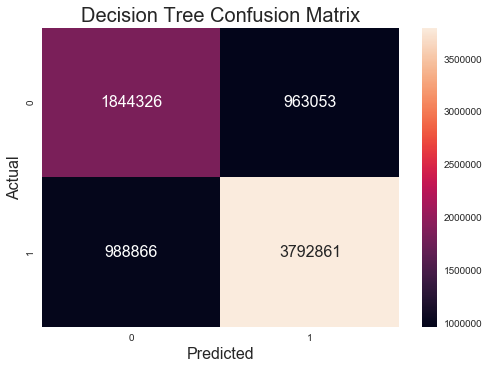

In [99]:
%%time
# making the confusion matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print('Accuracy: %.6f' % accuracy_score(y_test, y_pred))
output = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision: %.6f' % output[0])
print('Recall: %.6f' % output[1])
print('fscore: %.6f' % output[2])

sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Decision Tree Confusion Matrix',fontsize=20)

# Logistic regression

In [68]:
%%time
# 1 mins 6 seconds
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred_LR = classifier.predict(X_test)

CPU times: user 53 s, sys: 16.8 s, total: 1min 9s
Wall time: 1min 6s


Accuracy: 0.742800
Precision: 0.743298
Recall: 0.742800
fscore: 0.743040


Text(0.5, 1, 'Decision Tree Confusion Matrix')

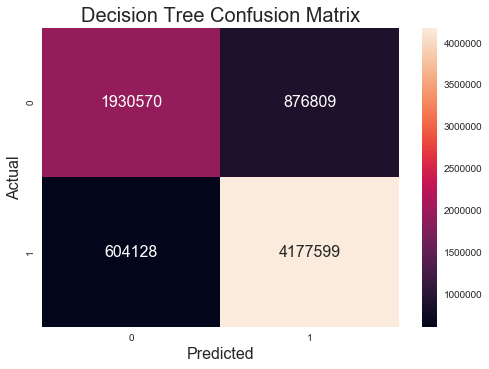

In [100]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred_LR)
#print(cm)
print('Accuracy: %.6f' % accuracy_score(y_test, y_pred))
output = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision: %.6f' % output[0])
print('Recall: %.6f' % output[1])
print('fscore: %.6f' % output[2])

sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Decision Tree Confusion Matrix',fontsize=20)

# Naive Bayes

In [70]:
%%time
# 16 seconds
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_NB = classifier.predict(X_test)

CPU times: user 8.66 s, sys: 3.59 s, total: 12.2 s
Wall time: 14.7 s


Accuracy: 0.742800
Precision: 0.743298
Recall: 0.742800
fscore: 0.743040
CPU times: user 13.2 s, sys: 767 ms, total: 14 s
Wall time: 14.3 s


Text(0.5, 1, 'Decision Tree Confusion Matrix')

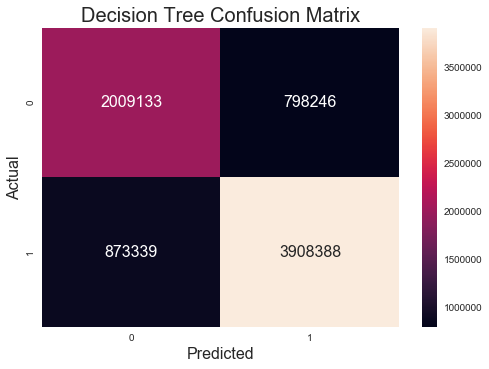

In [101]:
%%time
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred_NB)
#print(cm)
print('Accuracy: %.6f' % accuracy_score(y_test, y_pred))
output = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision: %.6f' % output[0])
print('Recall: %.6f' % output[1])
print('fscore: %.6f' % output[2])

sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Decision Tree Confusion Matrix',fontsize=20)

## ROC curves

AUC on decision tree: 0.725
AUC on logistic: 0.781
AUC on Naive Bayes: 0.767


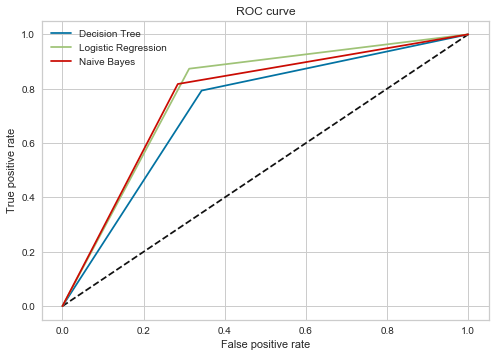

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Decision tree
fpr_dt_lm, tpr_dt_lm, _ = roc_curve(y_test, y_pred)
# logistic
fpr_lr_lm, tpr_lr_lm, _ = roc_curve(y_test, y_pred_LR)
# Naive Bayes
fpr_nb_lm, tpr_nb_lm, _ = roc_curve(y_test, y_pred_NB)

print('AUC on decision tree: %.3f' % roc_auc_score(y_test, y_pred))
print('AUC on logistic: %.3f' % roc_auc_score(y_test, y_pred_LR))
print('AUC on Naive Bayes: %.3f' % roc_auc_score(y_test, y_pred_NB))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt_lm, tpr_dt_lm, label='Decision Tree')
plt.plot(fpr_lr_lm, tpr_lr_lm, label='Logistic Regression')
plt.plot(fpr_nb_lm, tpr_nb_lm, label='Naive Bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Decision Tree: f1=0.795 auc=0.861
Logistic Regression: f1=0.849 auc=0.890
Naive Bayes: f1=0.824 auc=0.881


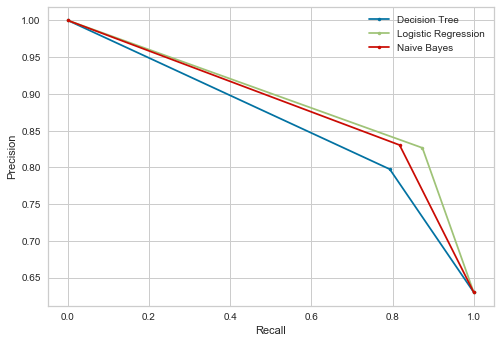

In [77]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_pred)
dt_f1, dt_auc = f1_score(y_test, y_pred), auc(dt_recall, dt_precision)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_LR)
lr_f1, lr_auc = f1_score(y_test, y_pred_LR), auc(lr_recall, lr_precision)

nb_precision, nb_recall, _ = precision_recall_curve(y_test, y_pred_NB)
nb_f1, nb_auc = f1_score(y_test, y_pred_NB), auc(nb_recall, nb_precision)

print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Naive Bayes: f1=%.3f auc=%.3f' % (nb_f1, nb_auc))

plt.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
plt.plot(nb_recall, nb_precision, marker='.', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Logistic gives the best result.